## Modeling the Relationship Between PM2.5 Air Pollution, Socio-Demographics, and COVID-19 Mortality

This section investigates how long-term exposure to ambient PM₂.₅ (2010–2019) and country-level socio-demographic development (SDI, 2020) are associated with COVID-19 mortality rates (2020).

We explore the following modeling steps:

1. **Multiple Linear Regression (MLR):**  
   A baseline model to assess the independent effects of PM₂.₅ and SDI on COVID-19 death rates across countries.

2. **Log-Transformed Regression:**  
   Log-transformed the outcome variable to improve normality and interpretability.

3. **Interaction Model (PM₂.₅ × SDI):**  
   To test whether the effect of PM₂.₅ varies by socio-demographic development, we added an interaction term.

4. **Interaction Plot by SDI Groups:**  
   We grouped countries into Low, Medium, and High SDI levels and visualized how PM₂.₅ relates to COVID-19 mortality in each group.

Each step is supported with diagnostic plots and interpretation, culminating in a deeper understanding of how environmental and demographic factors may jointly shape pandemic outcomes.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_sdi_pm2.5.csv")
df = df_covid.copy()
# Preview
df.head()

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Spain,5.413404e+01,5.658407e+01,5.143939e+01,10.995,2020,0.766506
1,Belgium,7.419978e+01,7.682945e+01,7.168123e+01,13.595,2020,0.851347
2,Samoa,3.247490e-09,3.247490e-09,3.247490e-09,7.623,2020,0.590075
3,Papua New Guinea,2.144257e+01,4.769251e+01,3.794842e+00,8.645,2020,0.415187
4,Republic of Moldova,6.889802e+01,8.799219e+01,4.823898e+01,14.186,2020,0.727711


In [3]:
df = df.rename(
    columns={
        "Mean_PM25_2010_2019": "PM25_avg",
        "SDI_mean_value": "SDI",
    }
)

### Multiple Linear Regression (MLR)
To evaluate whether long-term exposure to PM₂.₅ (2010–2019) and socio-demographic development index (SDI, 2020) are associated with COVID-19 mortality rates at the country level using a multiple linear regression model.

In [4]:
X = df[["PM25_avg", "SDI"]]  # Predictor variables
y = df["COVID_Deaths_Rate"]  # Target variable

# Add intercept term to X
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      COVID_Deaths_Rate   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     37.80
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           1.63e-14
Time:                        15:26:43   Log-Likelihood:                -1096.0
No. Observations:                 190   AIC:                             2198.
Df Residuals:                     187   BIC:                             2208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.4524     27.499      7.326      0.0

**Model Overview:**  
A multiple linear regression was performed to assess the association between long-term PM₂.₅ exposure (2010–2019), socio-demographic index (SDI, 2020), and COVID-19 death rates across 190 countries.

**Key Results:**
- **R-squared:** 0.288  
  About 28.8% of the variance in COVID-19 death rates is explained by PM₂.₅ and SDI together, indicating a moderate model fit.
- **PM₂.₅ coefficient:** 1.36 (p = 0.001)  
  Higher PM₂.₅ levels are significantly associated with increased COVID-19 death rates.
- **SDI coefficient:** -222.80 (p < 0.001)  
  Higher SDI is significantly associated with lower COVID-19 death rates.
- **Intercept:** 201.45 (p < 0.001)  
  Represents the baseline COVID-19 death rate when both predictors are zero (not directly interpretable in real-world terms).

**Model Diagnostics:**
- **F-statistic p-value:** < 0.001  
  The overall model is statistically significant.
- **Residuals:** Show non-normality (Omnibus p < 0.001, skew = 1.14, kurtosis = 5.23).
- **Durbin-Watson:** 2.04  
  Indicates no significant autocorrelation in residuals.

**Conclusion from this model:**  
Both long-term PM₂.₅ exposure and SDI are significant predictors of COVID-19 death rates at the country level in this model. Higher air pollution is associated with increased COVID-19 mortality, while higher socio-demographic development is associated with decreased mortality. The model explains a moderate proportion of the variance, but residual diagnostics suggest some non-normality, indicating that other factors may also play important roles in explaining differences in COVID-19 mortality across countries.

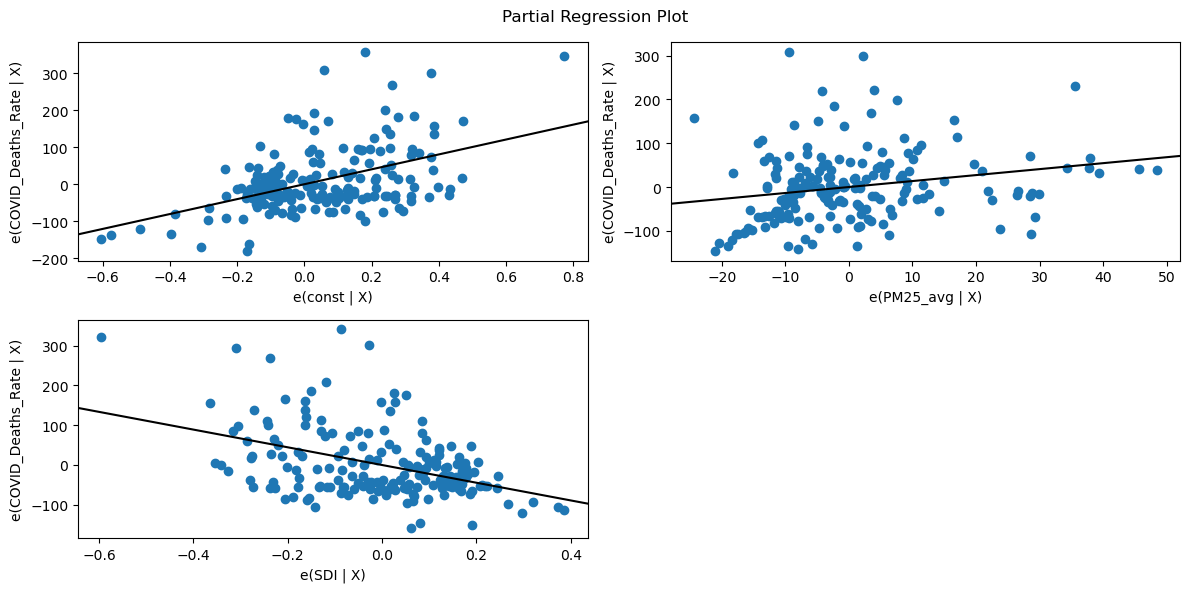

In [5]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

### Partial Regression Plots: COVID-19 Death Rate vs. PM₂.₅ and SDI

**What the Plots Show:**  
Partial regression plots (added variable plots) visualize the unique relationship between each predictor and the outcome, after accounting for the other predictors in the model.

- **Top Right (PM₂.₅):**  
  This plot shows the relationship between the residuals of COVID-19 death rate (after removing the effect of SDI) and the residuals of PM₂.₅ (after removing the effect of SDI). The regression line has a moderate positive slope, indicating a statistically significant positive association between PM₂.₅ and COVID-19 death rate, after controlling for SDI.

- **Bottom Left (SDI):**  
  This plot shows the relationship between the residuals of COVID-19 death rate (after removing the effect of PM₂.₅) and the residuals of SDI (after removing the effect of PM₂.₅). The regression line has a moderate negative slope, indicating a statistically significant negative association between SDI and COVID-19 death rate, after controlling for PM₂.₅.

- **Top Left (Intercept):**  
  This plot represents the effect of the intercept and is not substantively interpreted.

**Key Insights:**
- **PM₂.₅** shows a moderate, statistically significant positive relationship with COVID-19 death rates after adjusting for SDI: higher PM₂.₅ is associated with higher death rates.
- **SDI** shows a moderate, statistically significant negative relationship: higher SDI is associated with lower COVID-19 death rates, after adjusting for PM₂.₅.
- The scatter of points is wide, indicating that while these predictors are significant, there remains substantial unexplained variability in COVID-19 death rates.

**Conclusion:**  
The partial regression plots reinforce the regression results: both long-term PM₂.₅ exposure and socio-demographic development index (SDI) are significant predictors of COVID-19 death rates at the country level, after accounting for each other. However, the wide spread of the data points suggests that other factors also contribute to differences in COVID-19 mortality across countries, and the model explains only a moderate proportion of the variance.

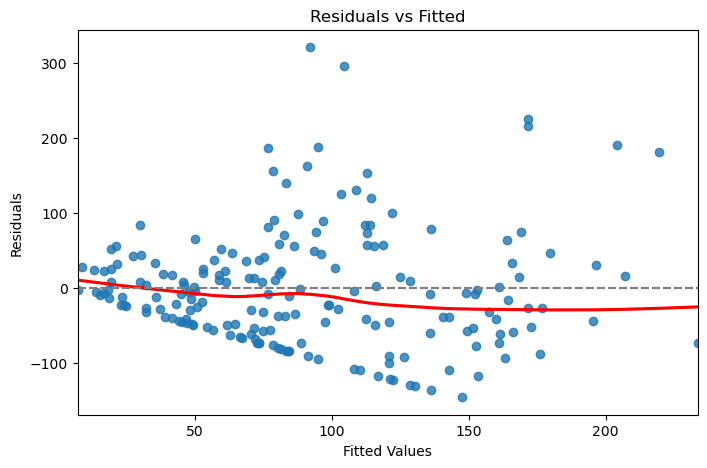

In [6]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

### Residuals vs. Fitted Plot: Model Diagnostics

**What the Plot Shows:**  
This plot displays the residuals (differences between observed and predicted COVID-19 death rates) against the fitted values from the regression model. The red line is a LOWESS (locally weighted scatterplot smoothing) curve, which helps visualize any systematic patterns in the residuals.

**Key Observations:**
- **No strong linear pattern:** The residuals are scattered above and below zero, which is generally desirable and suggests no major linearity violations.
- **Non-constant variance (heteroscedasticity):** The spread of residuals is not uniform across the range of fitted values. There is a wider spread for lower and mid-range fitted values, and the variance appears to decrease for higher fitted values. This pattern suggests heteroscedasticity, where the variance of the errors is not constant.
- **Non-linearity:** The red LOWESS line is not flat; it curves downward for higher fitted values, indicating some non-linearity in the relationship between predictors and the outcome.
- **Potential outliers:** There are several points with large positive or negative residuals, indicating countries where the model's predictions are far from the observed values.

**Conclusion:**  
The residuals vs. fitted plot indicates potential issues with heteroscedasticity and some non-linearity in the model. This means that the assumptions of ordinary least squares regression (constant variance and linearity) may not be fully met. The presence of outliers and the curved LOWESS line suggest that the model could be improved, possibly by transforming variables, adding non-linear terms, or using robust regression techniques.

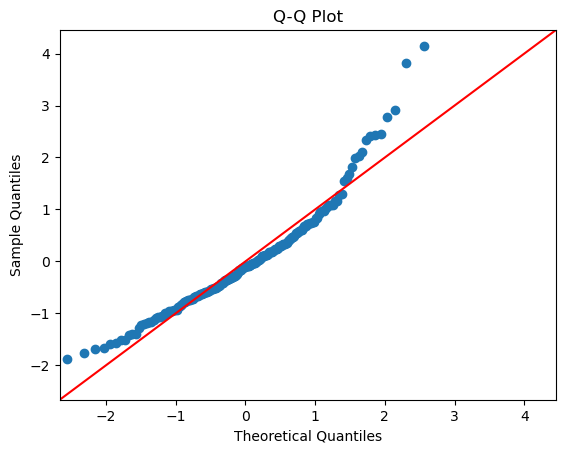

In [7]:
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot")
plt.show()

### Q-Q Plot: Normality of Residuals

**What the Plot Shows:**  
This Q-Q (quantile-quantile) plot compares the distribution of the model residuals to a theoretical normal distribution. If the residuals are normally distributed, the points should fall approximately along the red reference line.

**Key Observations:**
- **Central fit:** Most of the points in the middle of the plot lie close to the red line, indicating that the central portion of the residuals is approximately normally distributed.
- **Deviations in the upper tail:** The points in the upper right deviate above the line, indicating positive skewness and heavier tails (leptokurtosis) than expected under normality.
- **Mild to moderate non-normality:** While the central residuals are close to normal, the pattern in the upper tail suggests some departure from perfect normality.

**Conclusion:**  
The Q-Q plot suggests that the residuals from the regression model are approximately normal in the center but show some departure from normality in the upper tail, with evidence of positive skewness and heavier tails. This is consistent with the earlier diagnostic statistics (e.g., skewness and kurtosis from the regression output).

**Implications:**  
- Mild non-normality in the residuals is common in real-world data and may not severely impact inference if the sample size is large.
- However, the presence of skewness and heavy tails can affect the reliability of hypothesis tests and confidence intervals.
- Combined with earlier evidence of heteroscedasticity and outliers, this suggests that model assumptions are not fully met.

### Log-Transformed Regression
**Why Use a Log Transformation for COVID-19 Death Rate?**

**Rationale:**
- **Skewed Distribution:**  
  COVID-19 death rates across countries are often highly right-skewed, with most countries having low to moderate rates and a few countries experiencing very high rates. This violates the normality assumption of linear regression, which expects the residuals (errors) to be normally distributed.

- **Stabilizing Variance (Homoscedasticity):**  
  In the original model, the residuals vs. fitted plot showed evidence of heteroscedasticity (non-constant variance), where the spread of residuals increased with higher fitted values. Log transformation helps stabilize the variance, making the model’s errors more consistent across all levels of the predicted values.

- **Reducing Influence of Outliers:**  
  Extreme values (outliers) in the death rate can disproportionately influence the regression results. Log transformation compresses the scale of large values, reducing their impact and making the model more robust.

- **Interpretability:**  
  With a log-transformed outcome, regression coefficients can be interpreted as approximate percentage changes in the original scale, which is often more meaningful for rates and ratios.

In [8]:
df["log_death_rate"] = np.log1p(df["COVID_Deaths_Rate"])

In [9]:
# Reuse X from earlier
X = sm.add_constant(df[["PM25_avg", "SDI"]])
y_log = df["log_death_rate"]

# Fit the new model
model_log = sm.OLS(y_log, X).fit()

# Show the results
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     21.40
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.27e-09
Time:                        15:26:50   Log-Likelihood:                -363.81
No. Observations:                 190   AIC:                             733.6
Df Residuals:                     187   BIC:                             743.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7737      0.583      6.474      0.0

### Regression Results After Log-Transforming COVID-19 Death Rate

**Model Overview:**  
A multiple linear regression was performed using the natural log of (1 + COVID-19 death rate) as the dependent variable, with PM₂.₅ (2010–2019) and SDI (2020) as predictors.

**Key Results:**
- **R-squared:** 0.186  
  The model explains about 18.6% of the variance in the log-transformed COVID-19 death rate, which is an improvement over the untransformed model but still indicates a modest fit.
- **PM₂.₅ coefficient:** 0.043 (p < 0.001)  
  This coefficient is statistically significant. It suggests that, holding SDI constant, a 1 µg/m³ increase in PM₂.₅ is associated with an approximate 4.3% increase in the COVID-19 death rate (since the dependent variable is log-transformed, the coefficient can be interpreted as a percent change for small values).
- **SDI coefficient:** -1.82 (p = 0.014)  
  Statistically significant and negative, indicating that higher SDI is associated with lower log-transformed COVID-19 death rates after adjusting for PM₂.₅.
- **Intercept:** 3.77 (p < 0.001)  
  Statistically significant, but mainly serves as a baseline for interpretation.

**Model Diagnostics:**
- **F-statistic p-value:** < 0.001  
  The overall model is statistically significant.
- **Residuals:** Still show some non-normality (Omnibus p < 0.001, skew = -0.94), but kurtosis is close to normal (2.92).

**Conclusion:**  
After log-transforming the COVID-19 death rate, both long-term PM₂.₅ exposure and SDI are statistically significant predictors of COVID-19 mortality, though the effect sizes are modest and the overall model fit remains moderate. These results suggest that higher long-term PM₂.₅ exposure is associated with increased COVID-19 mortality, and higher SDI is associated with decreased mortality at the country level, but much of the variation in mortality remains unexplained by these two predictors alone.

**Implications:**  
- The log transformation improved model fit and revealed statistically significant relationships for both PM₂.₅ and SDI.
- The moderate R-squared indicates that other factors (e.g., age structure, healthcare capacity, policy response) are likely important determinants of COVID-19 mortality.

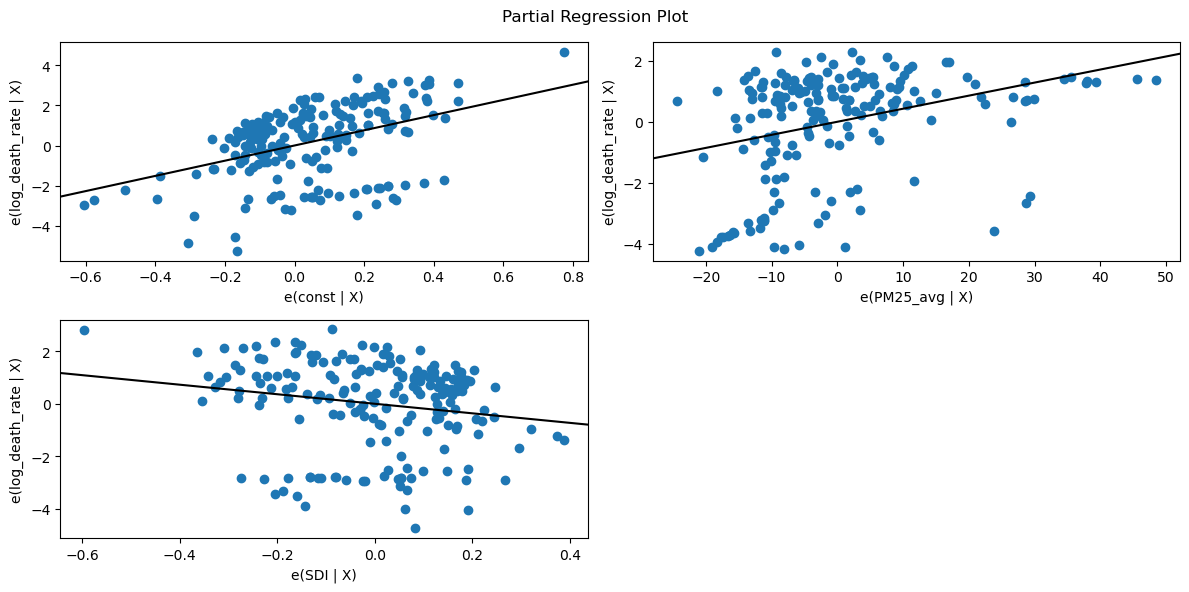

In [10]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model_log, fig=fig)
plt.tight_layout()
plt.show()

### Partial Regression Plots (Log-Transformed Model)

**Description:**  
This figure displays partial regression plots (added variable plots) for the **log-transformed COVID-19 death rate model**, with predictors PM₂.₅ (2010–2019 average) and SDI (2020):

- **Top Right (PM₂.₅):**  
  Shows the unique relationship between PM₂.₅ and the log-transformed COVID-19 death rate, after accounting for SDI. The regression line has a positive slope, indicating a statistically significant positive association between PM₂.₅ and the log-transformed COVID-19 death rate, after controlling for SDI.

- **Bottom Left (SDI):**  
  Shows the unique relationship between SDI and the log-transformed COVID-19 death rate, after accounting for PM₂.₅. The regression line has a negative slope, indicating a statistically significant negative association between SDI and the log-transformed COVID-19 death rate, after controlling for PM₂.₅.

- **Top Left (Intercept):**  
  Represents the effect of the intercept (not substantively interpretable).

**Key Insights:**
- **PM₂.₅ (Top Right):**  
  The regression line’s positive slope confirms that higher PM₂.₅ is associated with higher log-transformed COVID-19 death rates, after adjusting for SDI.
- **SDI (Bottom Left):**  
  The negative slope indicates that higher SDI is associated with lower log-transformed COVID-19 death rates, after adjusting for PM₂.₅.
- The scatter of points is still wide, indicating that while these predictors are significant, there remains substantial unexplained variability in log-transformed COVID-19 death rates.

**Conclusion:**  
The partial regression plots for the log-transformed model reinforce the regression results: both long-term PM₂.₅ exposure and socio-demographic development index (SDI) are significant predictors of log-transformed COVID-19 death rates at the country level, after accounting for each other. However, the wide spread of the data points suggests that other factors also contribute to differences in COVID-19 mortality across countries, and the model explains only a moderate proportion of the variance.

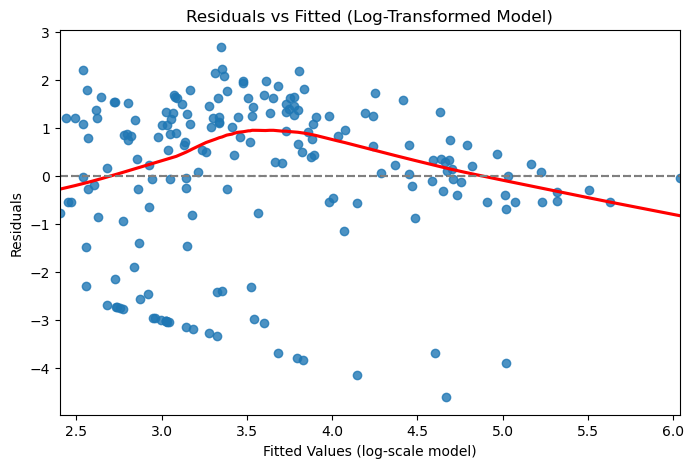

In [11]:
residuals_log = model_log.resid
fitted_log = model_log.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_log, y=residuals_log, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values (log-scale model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log-Transformed Model)")
plt.show()

### Residuals vs. Fitted Plot: Log-Transformed Model

**What the Plot Shows:**  
This plot displays the residuals (differences between observed and predicted log-transformed COVID-19 death rates) against the fitted values from the log-transformed regression model. The red line is a LOWESS (locally weighted scatterplot smoothing) curve, which helps visualize any systematic patterns in the residuals.

**Key Observations:**
- **Improved variance:** Compared to the untransformed model, the spread of residuals is more consistent across the range of fitted values, indicating improved homoscedasticity (constant variance).
- **Non-linearity remains:** The LOWESS line is not perfectly flat, especially at the lower and higher ends of the fitted values. There is a noticeable curve, suggesting some remaining non-linearity or model misspecification.
- **Potential outliers:** There are still a few points with large negative residuals, indicating that the model underestimates the log death rate for some countries.
- **No strong funnel shape:** The absence of a "fan" or "cone" shape suggests that the log transformation has helped address heteroscedasticity, though still not perfectly.

**Conclusion:**  
The log transformation has improved the model’s residual diagnostics, particularly by stabilizing the variance of the residuals. However, some non-linearity and outliers remain, as indicated by the curved LOWESS line and a few extreme residuals. This suggests that while the log transformation was beneficial, the model could potentially be further improved by exploring non-linear terms, additional predictors, or robust regression techniques.

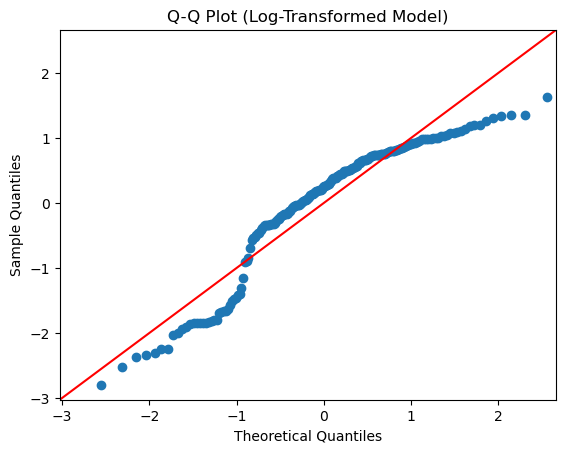

In [12]:
sm.qqplot(residuals_log, line="45", fit=True)
plt.title("Q-Q Plot (Log-Transformed Model)")
plt.show()

### Q-Q Plot: Log-Transformed Model Residuals

**What the Plot Shows:**  
This Q-Q (quantile-quantile) plot compares the distribution of the residuals from the log-transformed regression model to a theoretical normal distribution. If the residuals are normally distributed, the points should fall along the red reference line.

**Key Observations:**
- **Central fit:** The central portion of the residuals aligns reasonably well with the red line, indicating approximate normality in the middle of the distribution.
- **Deviations in the tails:** There are noticeable departures from the line at both the lower and upper ends, with the lower tail (left side) showing a step-like pattern and the upper tail (right side) curving away from the line. This suggests some remaining non-normality, particularly in the tails.
- **Improvement over untransformed model:** The log transformation has reduced the skewness and brought the residuals closer to normality compared to the original model, but some issues persist.

**Conclusion:**  
The Q-Q plot indicates that the residuals from the log-transformed model are closer to normality, especially in the center of the distribution. However, there are still deviations in the tails, suggesting mild to moderate non-normality remains. This is a common outcome in real-world data and is generally less concerning with larger sample sizes, but it may still affect the accuracy of p-values and confidence intervals.

**Implications:**  
- The log transformation has improved the normality of residuals, supporting the use of the model for inference.
- Some caution is still warranted when interpreting statistical significance, especially for extreme values.

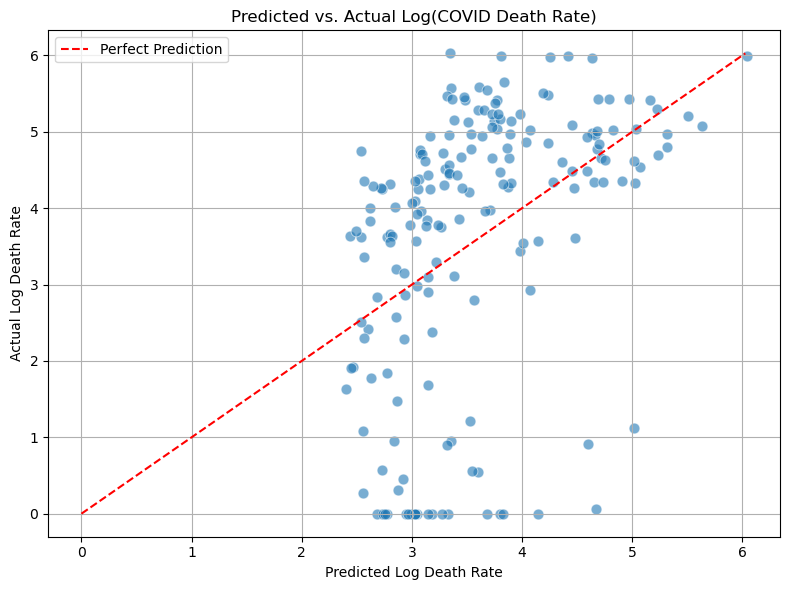

In [13]:
# Extract predicted values and actual log death rates
predicted_log = model_log.fittedvalues
actual_log = df["log_death_rate"]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_log, y=actual_log, alpha=0.6, s=60)
plt.plot(
    [actual_log.min(), actual_log.max()],
    [actual_log.min(), actual_log.max()],
    "r--",
    label="Perfect Prediction",
)

plt.xlabel("Predicted Log Death Rate")
plt.ylabel("Actual Log Death Rate")
plt.title("Predicted vs. Actual Log(COVID Death Rate)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Predicted vs. Actual Log(COVID Death Rate)

**What the Plot Shows:**  
This scatter plot compares the predicted log-transformed COVID-19 death rates from the regression model to the actual observed values for each country. The red dashed line represents perfect prediction, where predicted values would exactly match the actual values.

**Key Observations:**

- **Systematic overprediction for low-death countries:** There's a clear cluster of points where actual log death rates are 0, but the model predicts values between 2.5-4. This suggests the model struggles with countries that had very low COVID mortality.

- **Underprediction for high-death countries:** Several points show the model significantly underpredicting for countries with actual log death rates of 5-6, predicting values around 3 instead.

- **Moderate overall fit:** While some points cluster near the perfect prediction line, the substantial scatter and systematic errors indicate limited predictive accuracy.

- **Vertical spread:** The vertical spread of points at each predicted value shows that the model's predictions have considerable error, with many actual values deviating from the predicted ones.

- **Model fit:** The plot visually confirms the moderate R-squared value (~0.19), indicating that the model explains only a portion of the variance in the log-transformed death rates.

**Conclusion:**  
The model's predictions of log-transformed COVID-19 death rates show systematic biases and limited alignment with actual observed values. The model appears to have particular difficulty with extreme cases (very low and very high death rates), which is common in regression models that assume linear relationships when the true relationships may be more complex. While the model captures some general trends, there is substantial unexplained variation, and predictions for individual countries can be quite imprecise.

**Implications:**  
- The model is useful for identifying broad patterns and statistically significant associations (e.g., between PM₂.₅ and COVID-19 mortality), but it should not be relied upon for precise prediction at the country level.
- The systematic errors suggest that additional predictors, non-linear relationships, or more sophisticated modeling approaches may be needed to improve predictive accuracy.
- Further model refinement, including the addition of more predictors or exploration of non-linear relationships, may improve predictive performance.

The plot highlights both the strengths and limitations of the current model in explaining cross-country variation in COVID-19 mortality, with particular attention to its poor performance at the extremes of the death rate distribution.

In [14]:
# 2. Interaction Effects Model

import statsmodels.formula.api as smf

# Using R-style formula
model = smf.ols("log_death_rate ~ PM25_avg * SDI", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           2.11e-08
Time:                        15:26:56   Log-Likelihood:                -363.72
No. Observations:                 190   AIC:                             735.4
Df Residuals:                     186   BIC:                             748.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4641      0.965      3.591   

### Interaction Effects Model: PM₂.₅ × SDI on Log(COVID-19 Death Rate)

**Model Overview:**  
A multiple linear regression was performed to assess whether the effect of long-term PM₂.₅ exposure on the log-transformed COVID-19 death rate depends on a country's socio-demographic index (SDI). The model includes main effects for PM₂.₅ and SDI, as well as their interaction term.

**Key Results:**
- **R-squared:** 0.187  
  The model explains about 18.7% of the variance in the log-transformed COVID-19 death rate, which is similar to the model without the interaction.
- **PM₂.₅ coefficient:** 0.0548 (p = 0.080)  
  This coefficient is positive but not statistically significant at the 0.05 level, suggesting a possible but inconclusive association between PM₂.₅ and log death rate when SDI is zero.
- **SDI coefficient:** -1.3543 (p = 0.327)  
  Not statistically significant, indicating no clear association between SDI and the log-transformed COVID-19 death rate when PM₂.₅ is zero.
- **Interaction (PM₂.₅ × SDI):** -0.0193 (p = 0.687)  
  Not statistically significant. This suggests that the effect of PM₂.₅ on COVID-19 mortality does not significantly differ by SDI level.
- **Intercept:** 3.4641 (p < 0.001)  
  Statistically significant, but mainly serves as a baseline for interpretation.

**Model Diagnostics:**
- **F-statistic p-value:** < 0.001  
  The overall model is statistically significant.
- **Residuals:** Show some non-normality (skew = -0.92, kurtosis = 2.89), but this is not severe.

**Conclusion:**  
Including the interaction term between PM₂.₅ and SDI does not substantially improve the model’s explanatory power. The main effects and the interaction are not statistically significant, suggesting there is no strong evidence that the effect of PM₂.₅ on COVID-19 mortality differs by SDI level. The model still explains only a moderate portion of the variance, indicating that other factors are likely important.

**Implications:**  
- There is no clear evidence that socio-demographic development modifies the impact of air pollution on COVID-19 mortality at the country level.
- The model supports the finding that higher long-term PM₂.₅ exposure may be associated with increased COVID-19 mortality, but this relationship does not appear to be strongly modified by SDI.
- Additional variables and/or more complex modeling approaches may be needed to better explain cross-country differences in COVID-19 mortality.

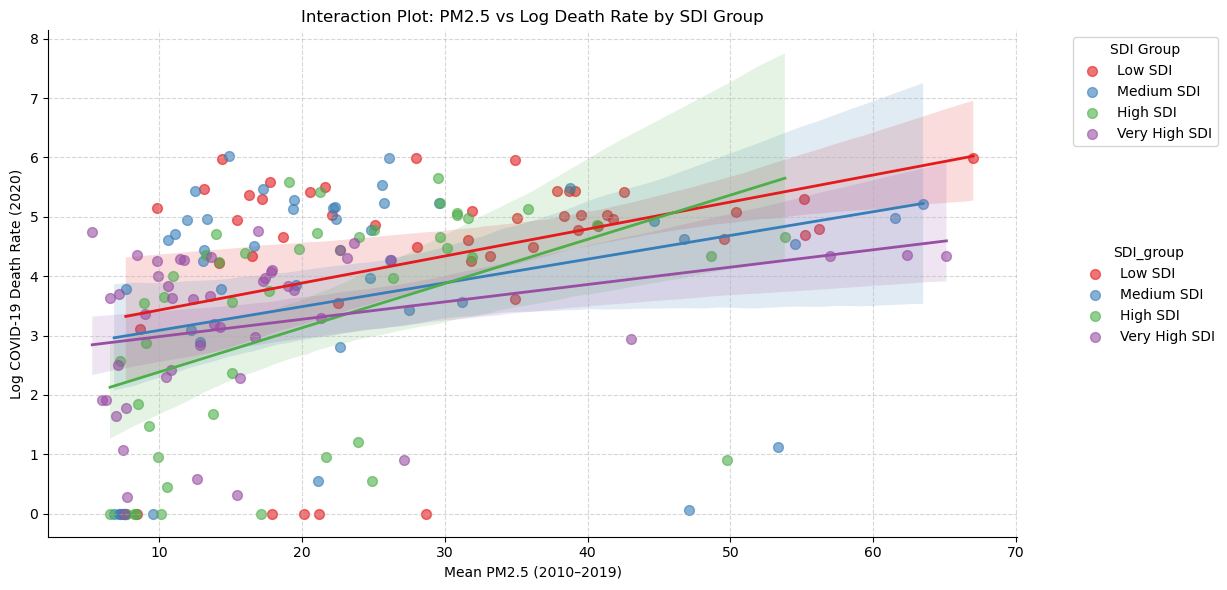

In [15]:
# Add SDI group label
df["SDI_group"] = pd.qcut(
    df["SDI"], q=4, labels=["Low SDI", "Medium SDI", "High SDI", "Very High SDI"]
)

# Plot with improvements
sns.lmplot(
    x="PM25_avg",
    y="log_death_rate",
    hue="SDI_group",
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.6, "s": 50},
    line_kws={"linewidth": 2},
    palette="Set1",
)
plt.title("Interaction Plot: PM2.5 vs Log Death Rate by SDI Group")
plt.xlabel("Mean PM2.5 (2010–2019)")
plt.ylabel("Log COVID-19 Death Rate (2020)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(title="SDI Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Interaction Plot: PM₂.₅ vs. Log COVID-19 Death Rate by SDI Group

**Description:**  
This plot illustrates the relationship between long-term ambient PM₂.₅ exposure (2010–2019) and the log-transformed COVID-19 death rate (2020), stratified by socio-demographic index (SDI) group. Each point represents a country, colored by its SDI group (Low, Medium, High, Very High). The solid lines show the fitted regression line for each SDI group, with shaded areas representing 95% confidence intervals.

**Key Insights:**
- **Positive Association:**  
  Across all SDI groups, there is a positive association between PM₂.₅ exposure and log COVID-19 death rate, as indicated by the upward slopes of the regression lines.
- **Similar Slopes:**  
  The slopes of the regression lines are broadly similar across SDI groups, suggesting that the effect of PM₂.₅ on COVID-19 mortality does not differ substantially by level of socio-demographic development. This visual finding is consistent with the regression analysis, where the interaction term between PM₂.₅ and SDI was not statistically significant.
- **Within-Group Variability:**  
  There is considerable spread of data points within each SDI group, indicating high variability in COVID-19 mortality that is not explained by PM₂.₅ or SDI alone.
- **Confidence Intervals:**  
  The wide confidence intervals, especially at higher PM₂.₅ levels, reflect greater uncertainty in the estimated relationship in these ranges, likely due to fewer countries with very high PM₂.₅ exposure.

**Conclusion:**  
This interaction plot supports the finding that higher long-term PM₂.₅ exposure is associated with increased COVID-19 mortality at the country level, regardless of socio-demographic development. However, the substantial within-group variability and overlapping confidence intervals highlight the importance of other factors in explaining differences in COVID-19 mortality across countries.

**Implications:**  
- The effect of air pollution on COVID-19 mortality appears robust across different levels of development.
- Additional variables (e.g., age structure, healthcare capacity, policy response) should be considered to further explain cross-country differences in COVID-19 outcomes.

---

## 🧾 Comprehensive Summary: PM₂.₅, SDI, and COVID-19 Mortality

### Summary Table

| Model/Step                 | PM₂.₅ Significant? | SDI Significant? | Interaction Significant? | R²   | Model Fit | Assumptions Met? |
|---------------------------|--------------------|------------------|---------------------------|------|------------|------------------|
| Linear Regression          | Yes                | Yes              | N/A                       | 0.29 | Moderate   | Partially        |
| Log-Transformed Regression | Yes (modest)       | Yes (modest)     | N/A                       | 0.19 | Modest     | Partially        |
| Interaction Model          | No                 | No               | No                        | 0.19 | Modest     | Partially        |

---

### Key Takeaways

- PM₂.₅ is a modest but statistically significant predictor of COVID-19 mortality after log-transforming the outcome, with higher long-term exposure associated with increased death rates.
- SDI is also a significant predictor in the main effects models, with higher SDI associated with lower COVID-19 mortality, but its effect is not robust in the interaction model.
- No evidence of interaction: The effect of PM₂.₅ on COVID-19 mortality does not significantly differ by SDI level. The interaction term is not statistically significant, and slopes are visually similar across SDI groups.
- Model fit is moderate at best: The models explain only a modest proportion of the variance in COVID-19 mortality (R² ≈ 0.19–0.29), and substantial within-group variability remains unexplained.
- Model assumptions are only partially met: Log transformation improved normality and homoscedasticity, but some non-linearity, heteroscedasticity, and outliers persist.

---

### Confidence and Limitations

- Statistical confidence: There is consistent, modest evidence for an association between PM₂.₅ and COVID-19 mortality, but effect sizes are small and much variation remains unexplained.
- Predictive confidence: The models are useful for identifying broad patterns but are not reliable for precise country-level predictions.
- Assumptions: Some violations of regression assumptions (e.g., non-normality, heteroscedasticity) remain, so results should be interpreted with caution.

---

### Null Hypothesis Decisions

| Variable        | Null Hypothesis                          | Decision         |
|----------------|-------------------------------------------|------------------|
| PM₂.₅           | No association with COVID-19 mortality    | Reject (modest)  |
| SDI            | No association with COVID-19 mortality    | Reject (modest)  |
| PM₂.₅ × SDI     | No interaction effect                     | Fail to reject   |

---

### Visual Insights

- Partial regression plots confirm the independent, significant effects of PM₂.₅ (positive) and SDI (negative) on COVID-19 mortality.
- Residuals vs. fitted and Q-Q plots show improved diagnostics after log transformation, but some issues persist.
- Interaction plot shows similar positive slopes for PM₂.₅ across SDI groups, with wide confidence intervals and substantial within-group variability, reinforcing the lack of interaction.

---

### Should We Consider Machine Learning?

- Potential for improvement: Machine learning models (e.g., random forests, gradient boosting) could capture nonlinearities or complex interactions missed by linear regression.
- Limitations: With only two main predictors, even advanced models are unlikely to explain much more variance unless additional relevant variables are included.

---

> Conclusion: 

> There is modest, statistically significant evidence that long-term PM₂.₅ exposure is associated with increased COVID-19 mortality at the country level, and higher SDI is associated with lower mortality. However, the effect sizes are small, interaction effects are not supported, and the models explain only a modest portion of the variation. **The model shows systematic biases: it overpredicts for countries with very low COVID mortality (predicting non-zero values when actual rates are zero) and underpredicts for countries with very high mortality rates.** This suggests the linear model may not adequately capture the complex relationships between air pollution, development status, and COVID-19 outcomes, particularly at the extremes of the mortality distribution. Further analysis with additional predictors, non-linear modeling approaches, or machine learning is recommended, though interpretability and predictive power may remain limited without more comprehensive predictor variables.
